<a href="https://colab.research.google.com/github/Alejandrico14/Temas-Especiales/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto**

En la actualidad múchas veces resulta deficil encontrar información que es verdadera , o datos que nos sean útiles cuando estámos explorando internet, por ello es que se planteo un ejercicio interesante , cuando navegas en tweeter ¿qué cosas posteadas son reales? bueno pues si nos vamos a lo muy general con éste rubro, el resultado podría llegar a ser muy amplio, pero para éste ejercicio vamos a analizar únicamente los Tweets que hablan sobre algun desastre o tragedia que suscede e intentar descifrar si alguna es verdadera o falsa 

Es importante aclarar que los datos que van a aparecer en éste documento se tratan de un conglomerado de Columnas donde principalmente se analizará el "Tweet específico" que será reconocido mediante una "ID" , el texto = "TEXT"
Una "keyword" que dependiendo del problema puede o no tener una palabra que identifique el tipo del desastre(puede variar mucho ésto) y finalmente "target" que sería lo que más nos interesa aquí, pues se trata del elemento que nos indica si el tweet es real (1) o no (0) Por lo que con todo ésto dicho de espera poder interpretar o al menos conocer ¿cómo diferenciar los datos reales de los que son falsos?.

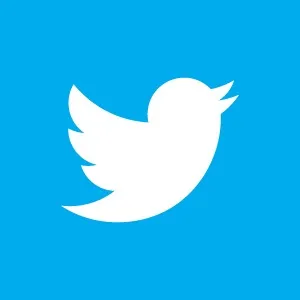

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
from wordcloud import STOPWORDS
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
import os


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
#lectura de datos ahora si
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [44]:
train.shape

(7613, 5)

In [124]:
tweet = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
tweet.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Ejemplos')

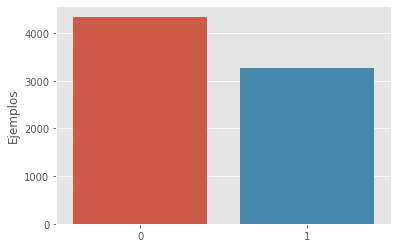

In [133]:
x=tweet.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('Ejemplos')

De la gráfica anterior la distribución es interesante, resultamos con menos No desastres que con los que de verdad son un desastre

In [90]:
train.info


<bound method DataFrame.info of          id keyword location                                               text  target
0         1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1         4     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2         5     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3         6     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4         7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1
...     ...     ...      ...                                                ...     ...
7608  10869     NaN      NaN  Two giant cranes holding a bridge collapse int...       1
7609  10870     NaN      NaN  @aria_ahrary @TheTawniest The out of control w...       1
7610  10871     NaN      NaN  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1
7611  10872     NaN      NaN  Police investigating after an e-bike collided ...       1


In [89]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [48]:
train.describe(include=['O'])

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


In [91]:
train.groupby(['id','text']).count()['keyword']

id     text                                                                                                                                     
1      Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                                        0
4      Forest fire near La Ronge Sask. Canada                                                                                                       0
5      All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected        0
6      13,000 people receive #wildfires evacuation orders in California                                                                             0
7      Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school                                                      0
                                                                                                         

In [92]:
group_id = train.groupby(['keyword','target']).count()['location']
group_id.unstack(level=0)

keyword,ablaze,accident,aftershock,airplane%20accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,arson,arsonist,attack,attacked,avalanche,battle,bioterror,bioterrorism,blaze,blazing,bleeding,blew%20up,blight,blizzard,blood,bloody,blown%20up,body%20bag,body%20bagging,body%20bags,bomb,bombed,bombing,bridge%20collapse,buildings%20burning,buildings%20on%20fire,burned,burning,burning%20buildings,bush%20fires,casualties,casualty,catastrophe,catastrophic,chemical%20emergency,cliff%20fall,collapse,collapsed,collide,collided,collision,crash,crashed,crush,crushed,curfew,cyclone,damage,danger,dead,death,deaths,debris,deluge,deluged,demolish,demolished,demolition,derail,derailed,derailment,desolate,desolation,destroy,destroyed,destruction,detonate,detonation,devastated,devastation,disaster,displaced,drought,drown,drowned,drowning,dust%20storm,earthquake,electrocute,electrocuted,emergency,emergency%20plan,emergency%20services,engulfed,epicentre,evacuate,evacuated,evacuation,explode,exploded,explosion,eyewitness,famine,fatal,fatalities,fatality,fear,fire,fire%20truck,first%20responders,flames,flattened,flood,flooding,floods,forest%20fire,forest%20fires,hail,hailstorm,harm,hazard,hazardous,heat%20wave,hellfire,hijack,hijacker,hijacking,hostage,hostages,hurricane,injured,injuries,injury,inundated,inundation,landslide,lava,lightning,loud%20bang,mass%20murder,mass%20murderer,massacre,mayhem,meltdown,military,mudslide,natural%20disaster,nuclear%20disaster,nuclear%20reactor,obliterate,obliterated,obliteration,oil%20spill,outbreak,pandemonium,panic,panicking,police,quarantine,quarantined,radiation%20emergency,rainstorm,razed,refugees,rescue,rescued,rescuers,riot,rioting,rubble,ruin,sandstorm,screamed,screaming,screams,seismic,sinkhole,sinking,siren,sirens,smoke,snowstorm,storm,stretcher,structural%20failure,suicide%20bomb,suicide%20bomber,suicide%20bombing,sunk,survive,survived,survivors,terrorism,terrorist,threat,thunder,thunderstorm,tornado,tragedy,trapped,trauma,traumatised,trouble,tsunami,twister,typhoon,upheaval,violent%20storm,volcano,war%20zone,weapon,weapons,whirlwind,wild%20fires,wildfire,windstorm,wounded,wounds,wreck,wreckage,wrecked
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.0,7.0,25.0,5.0,14.0,16.0,11.0,11.0,28.0,12.0,9.0,21.0,8.0,12.0,21.0,16.0,11.0,2.0,20.0,19.0,17.0,21.0,24.0,16.0,15.0,25.0,21.0,20.0,20.0,22.0,14.0,9.0,1.0,4.0,7.0,4.0,16.0,13.0,10.0,3.0,7.0,10.0,19.0,7.0,13.0,20.0,17.0,17.0,23.0,11.0,10.0,8.0,9.0,21.0,18.0,22.0,9.0,15.0,23.0,15.0,15.0,9.0,NaN,24.0,9.0,23.0,16.0,16.0,16.0,9.0,NaN,13.0,24.0,18.0,17.0,18.0,20.0,5.0,9.0,8.0,14.0,9.0,5.0,16.0,15.0,17.0,9.0,6.0,19.0,8.0,16.0,13.0,19.0,9.0,8.0,8.0,2.0,6.0,21.0,12.0,9.0,11.0,5.0,8.0,13.0,21.0,25.0,16.0,5.0,13.0,19.0,24.0,16.0,7.0,7.0,3.0,2.0,12.0,6.0,26.0,15.0,8.0,5.0,18.0,11.0,10.0,14.0,9.0,4.0,9.0,6.0,19.0,18.0,24.0,4.0,11.0,20.0,13.0,20.0,3.0,11.0,7.0,21.0,17.0,15.0,16.0,13.0,2.0,13.0,20.0,21.0,18.0,0.0,1.0,18.0,23.0,21.0,10.0,19.0,15.0,3.0,13.0,3.0,12.0,12.0,14.0,1.0,18.0,9.0,12.0,27.0,7.0,18.0,25.0,20.0,10.0,10.0,17.0,24.0,17.0,15.0,15.0,11.0,20.0,9.0,2.0,0.0,0.0,20.0,17.0,16.0,6.0,4.0,6.0,8.0,13.0,4.0,9.0,11.0,15.0,15.0,20.0,19.0,13.0,18.0,1.0,25.0,5.0,5.0,11.0,17.0,15.0,22.0,4.0,4.0,17.0,6.0,19.0,23.0,NaN,20.0
1,12.0,21.0,NaN,24.0,12.0,4.0,7.0,6.0,4.0,3.0,13.0,7.0,17.0,16.0,2.0,3.0,17.0,9.0,5.0,1.0,4.0,0.0,2.0,3.0,4.0,3.0,5.0,1.0,4.0,1.0,8.0,16.0,13.0,16.0,18.0,25.0,4.0,8.0,18.0,14.0,18.0,12.0,2.0,14.0,13.0,5.0,12.0,9.0,3.0,17.0,26.0,7.0,14.0,1.0,2.0,4.0,12.0,15.0,7.0,4.0,9.0,19.0,22.0,5.0,5.0,5.0,4.0,6.0,11.0,22.0,25.0,4.0,6.0,6.0,6.0,3.0,8.0,3.0,11.0,17.0,10.0,20.0,23.0,2.0,11.0,6.0,15.0,24.0,1.0,10.0,10.0,18.0,8.0,9.0,1.0,16.0,25.0,23.0,2.0,6.0,9.0,10.0,17.0,16.0,19.0,5.0,3.0,7.0,14.0,9.0,12.0,5.0,13.0,21.0,17.0,9.0,13.0,14.0,19.0,4.0,4.0,12.0,18.0,4.0,10.0

keyword                target
ablaze                 0         17
                       1         12
accident               0          7
                       1         21
aftershock             0         25
airplane%20accident    0          5
                       1         24
ambulance              0         14
                       1         12
annihilated            0         16
                       1          4
annihilation           0         11
                       1          7
apocalypse             0         11
                       1          6
armageddon             0         28
                       1          4
army                   0         12
                       1          3
arson                  0          9
                       1         13
arsonist               0         21
                       1          7
attack                 0          8
                       1         17
attacked               0         12
                       1         1

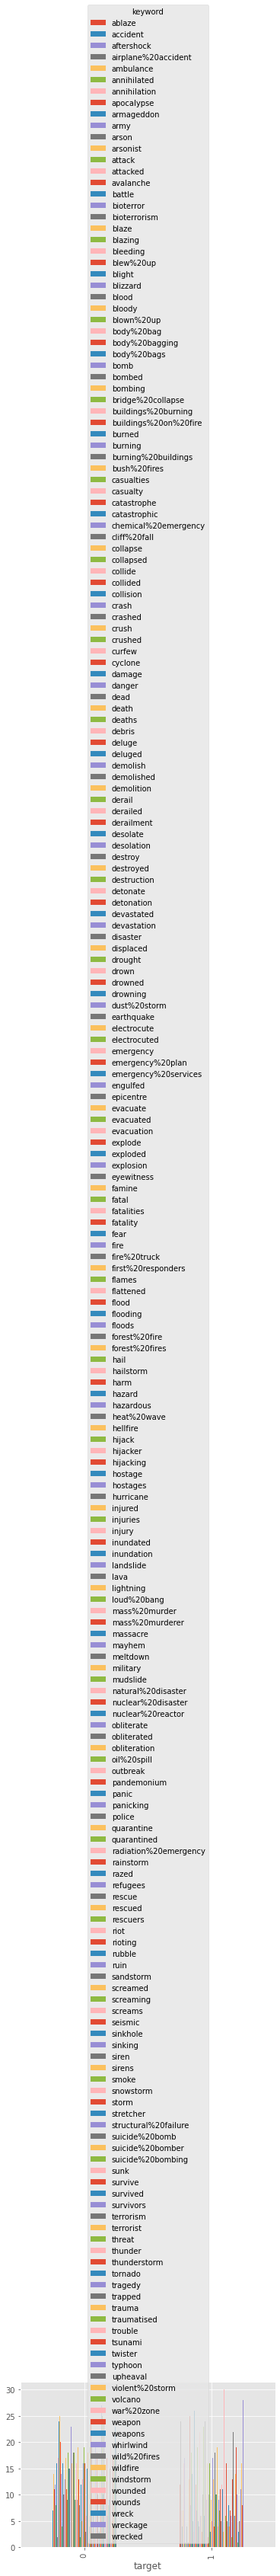

In [93]:
group_id = train.groupby(['keyword','target']).count()['location']
print(group_id)
(group_id.unstack(level=0).plot.bar())
plt.show()

In [95]:
train[['id','target']].head(10)

,id,target
0,1,1
1,4,1
2,5,1
3,6,1
4,7,1
5,8,1
6,10,1
7,13,1
8,14,1
9,15,1


Aquí se va a chechar el número de Caracteres en los Tweets


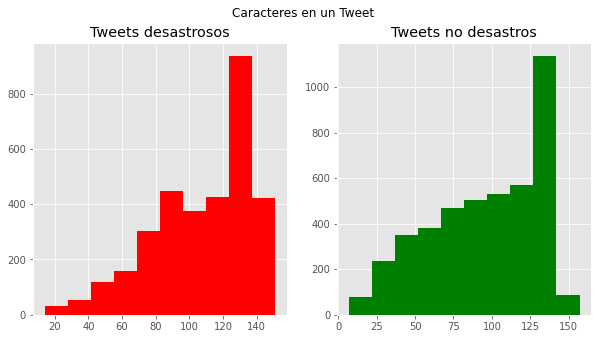

In [130]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Tweets desastrosos')
tweet_len=tweet[tweet['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Tweets no desastros')
fig.suptitle('Caracteres en un Tweet')
plt.show()

Lo mismo pero ahora contando el número de palabras

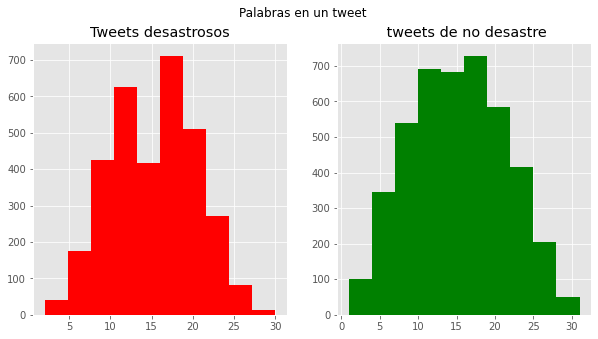

In [129]:
#sería interesante conocer el número de palabras de un tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Tweets desastrosos')
tweet_len=tweet[tweet['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title(' tweets de no desastre')
fig.suptitle('Palabras en un tweet')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'promedio del tamaño de cada Tweet')

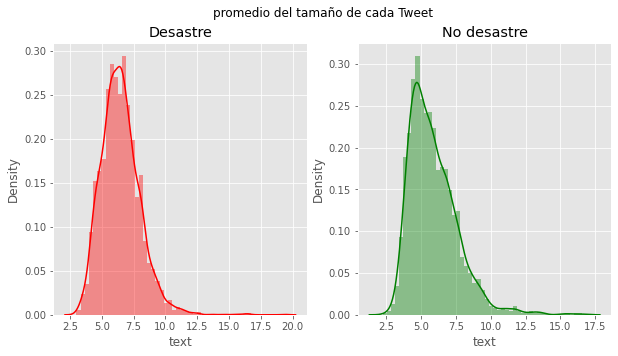

In [132]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=tweet[tweet['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Desastre')
word=tweet[tweet['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('No desastre')
fig.suptitle('promedio del tamaño de cada Tweet')

Se planea analizar los Tweets donde el desastre no es real y también en los que si es real

<BarContainer object of 10 artists>

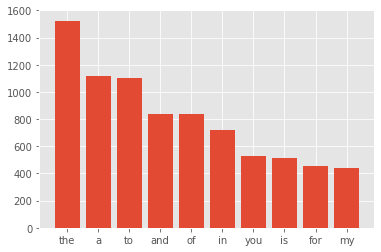

In [127]:
def create_corpus(target):
    corpus=[]
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus



corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 18 artists>

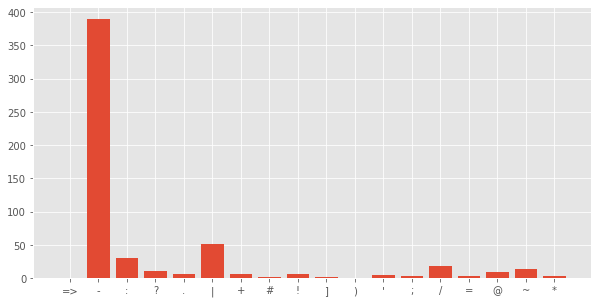

In [112]:
#hay que ver cuáles tweet indican un desastre real 
#pero viendo solamente los signos de puntuación
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

aqui se analizan los signos de puntucación cuando el desastre es falso 


<BarContainer object of 20 artists>

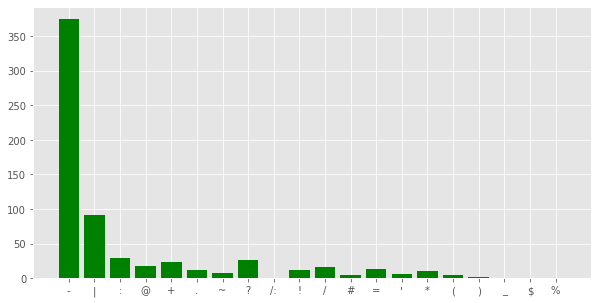

In [113]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

¿palabras más comúnes?

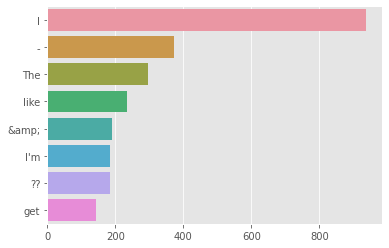

In [102]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

Sacar N-grams

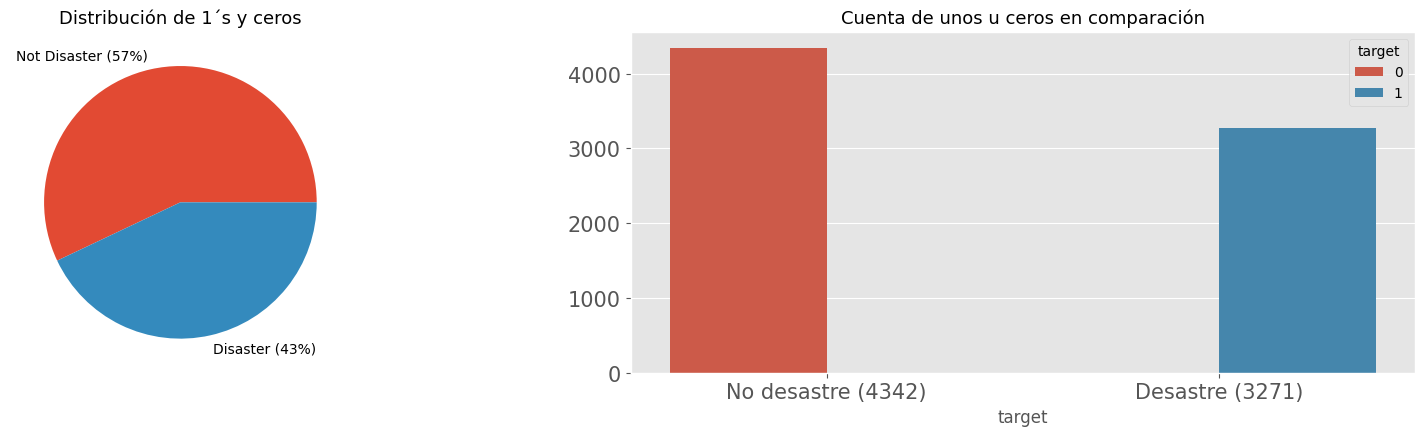

In [120]:
df_train = pd.read_csv('/content/train.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('/content/test.csv', dtype={'id': np.int16})

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

df_train.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['No desastre (57%)', 'Desastre (43%)'])
sns.countplot(x=df_train['target'], hue=df_train['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['No desastre (4342)', 'Desastre (3271)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Distribución de 1´s y ceros', fontsize=13)
axes[1].set_title('Cuenta de unos u ceros en comparación', fontsize=13)

plt.show()

Aquí se buscaran los Unigramas para tratar de encontrar algún tipo de relación con lo que si se considera un desastre de lo que no. 

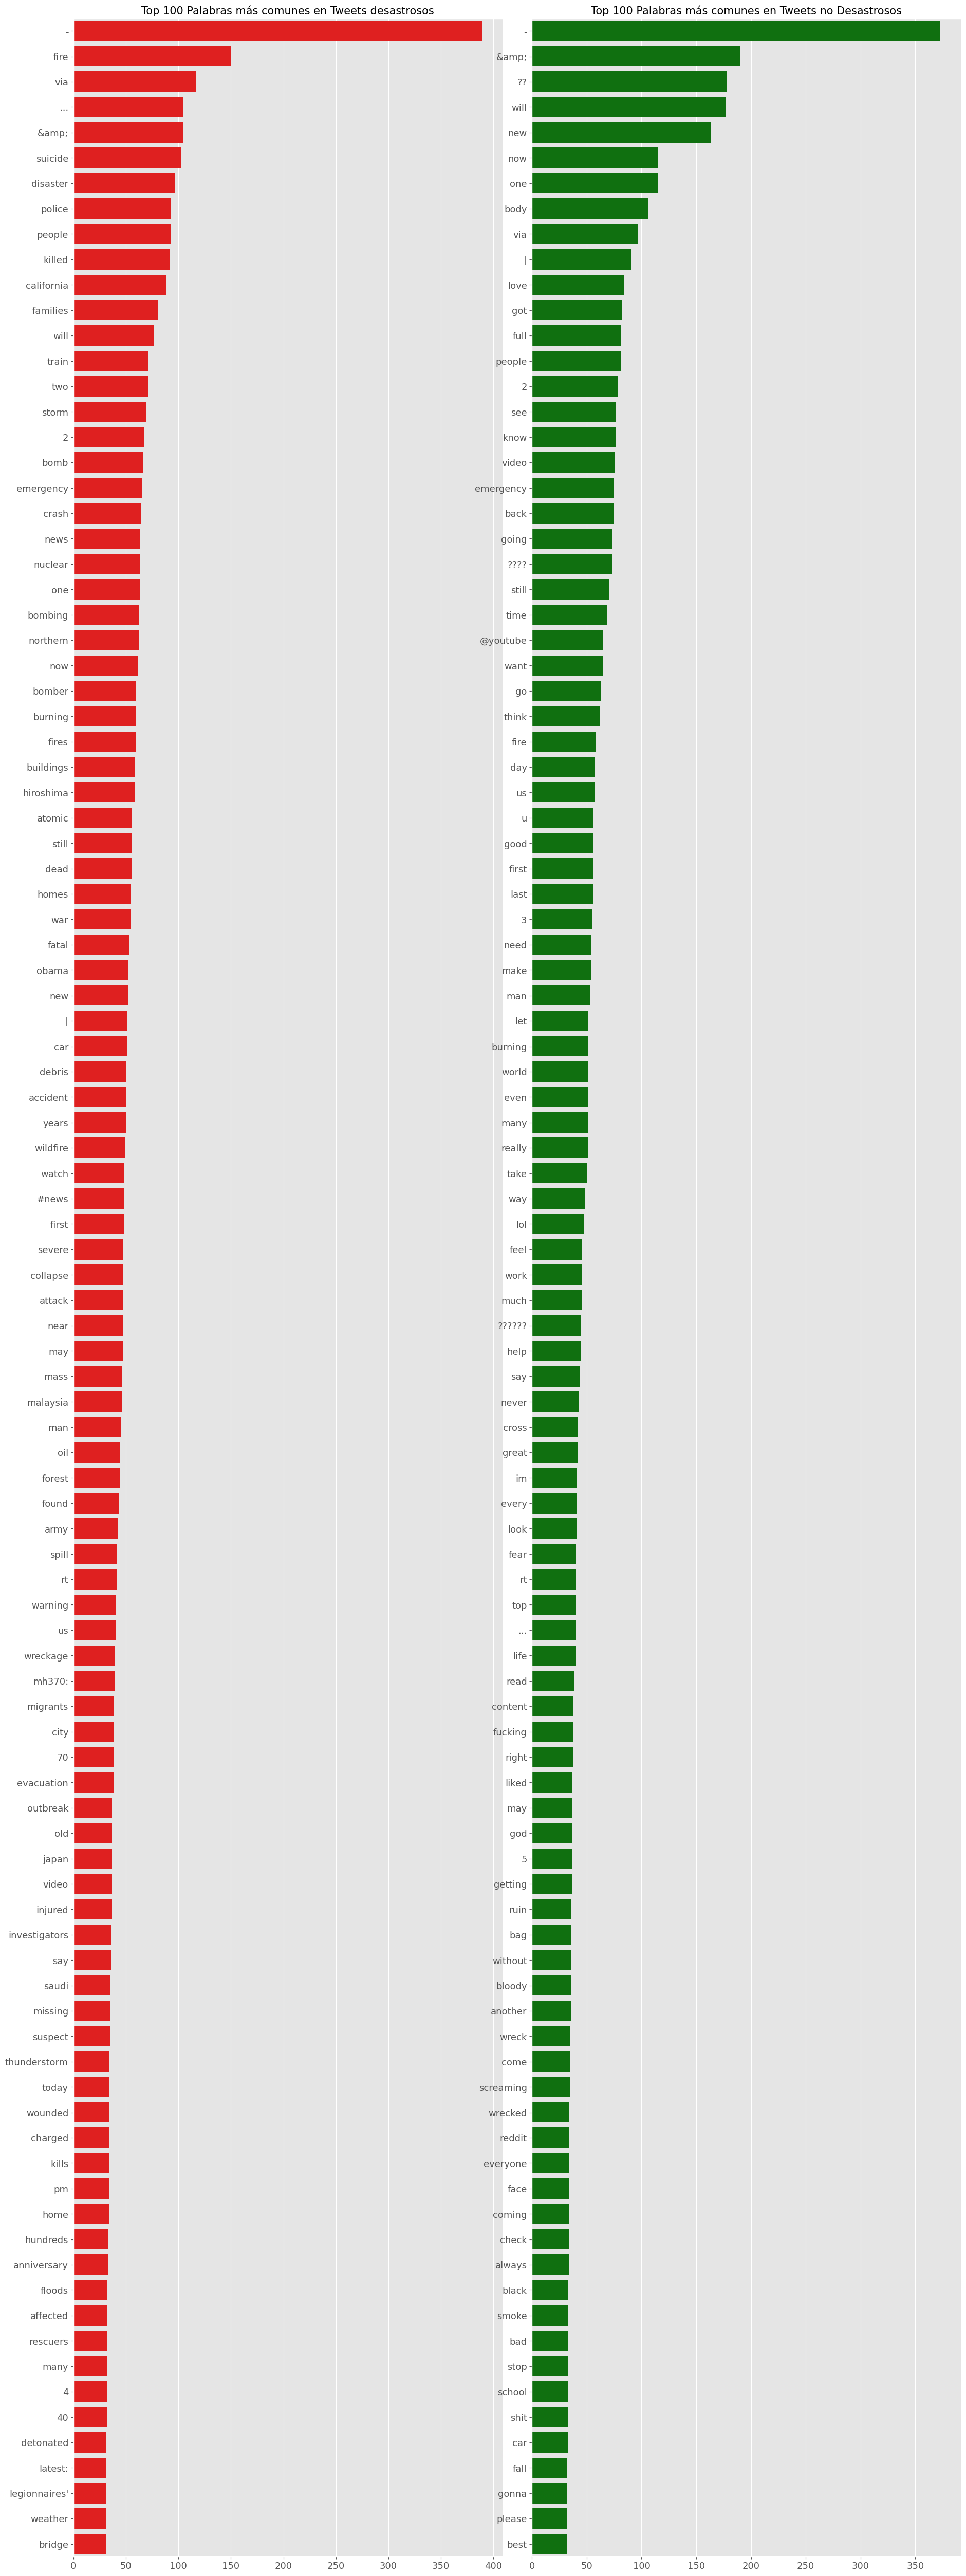

In [119]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
DISASTER_TWEETS = df_train['target'] == 1
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} Palabras más comunes en Tweets desastrosos', fontsize=15)
axes[1].set_title(f'Top {N} Palabras más comunes en Tweets no Desastrosos', fontsize=15)

plt.show()

Ahora hay que checar si existe más relación en la información si usamos trigramas

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


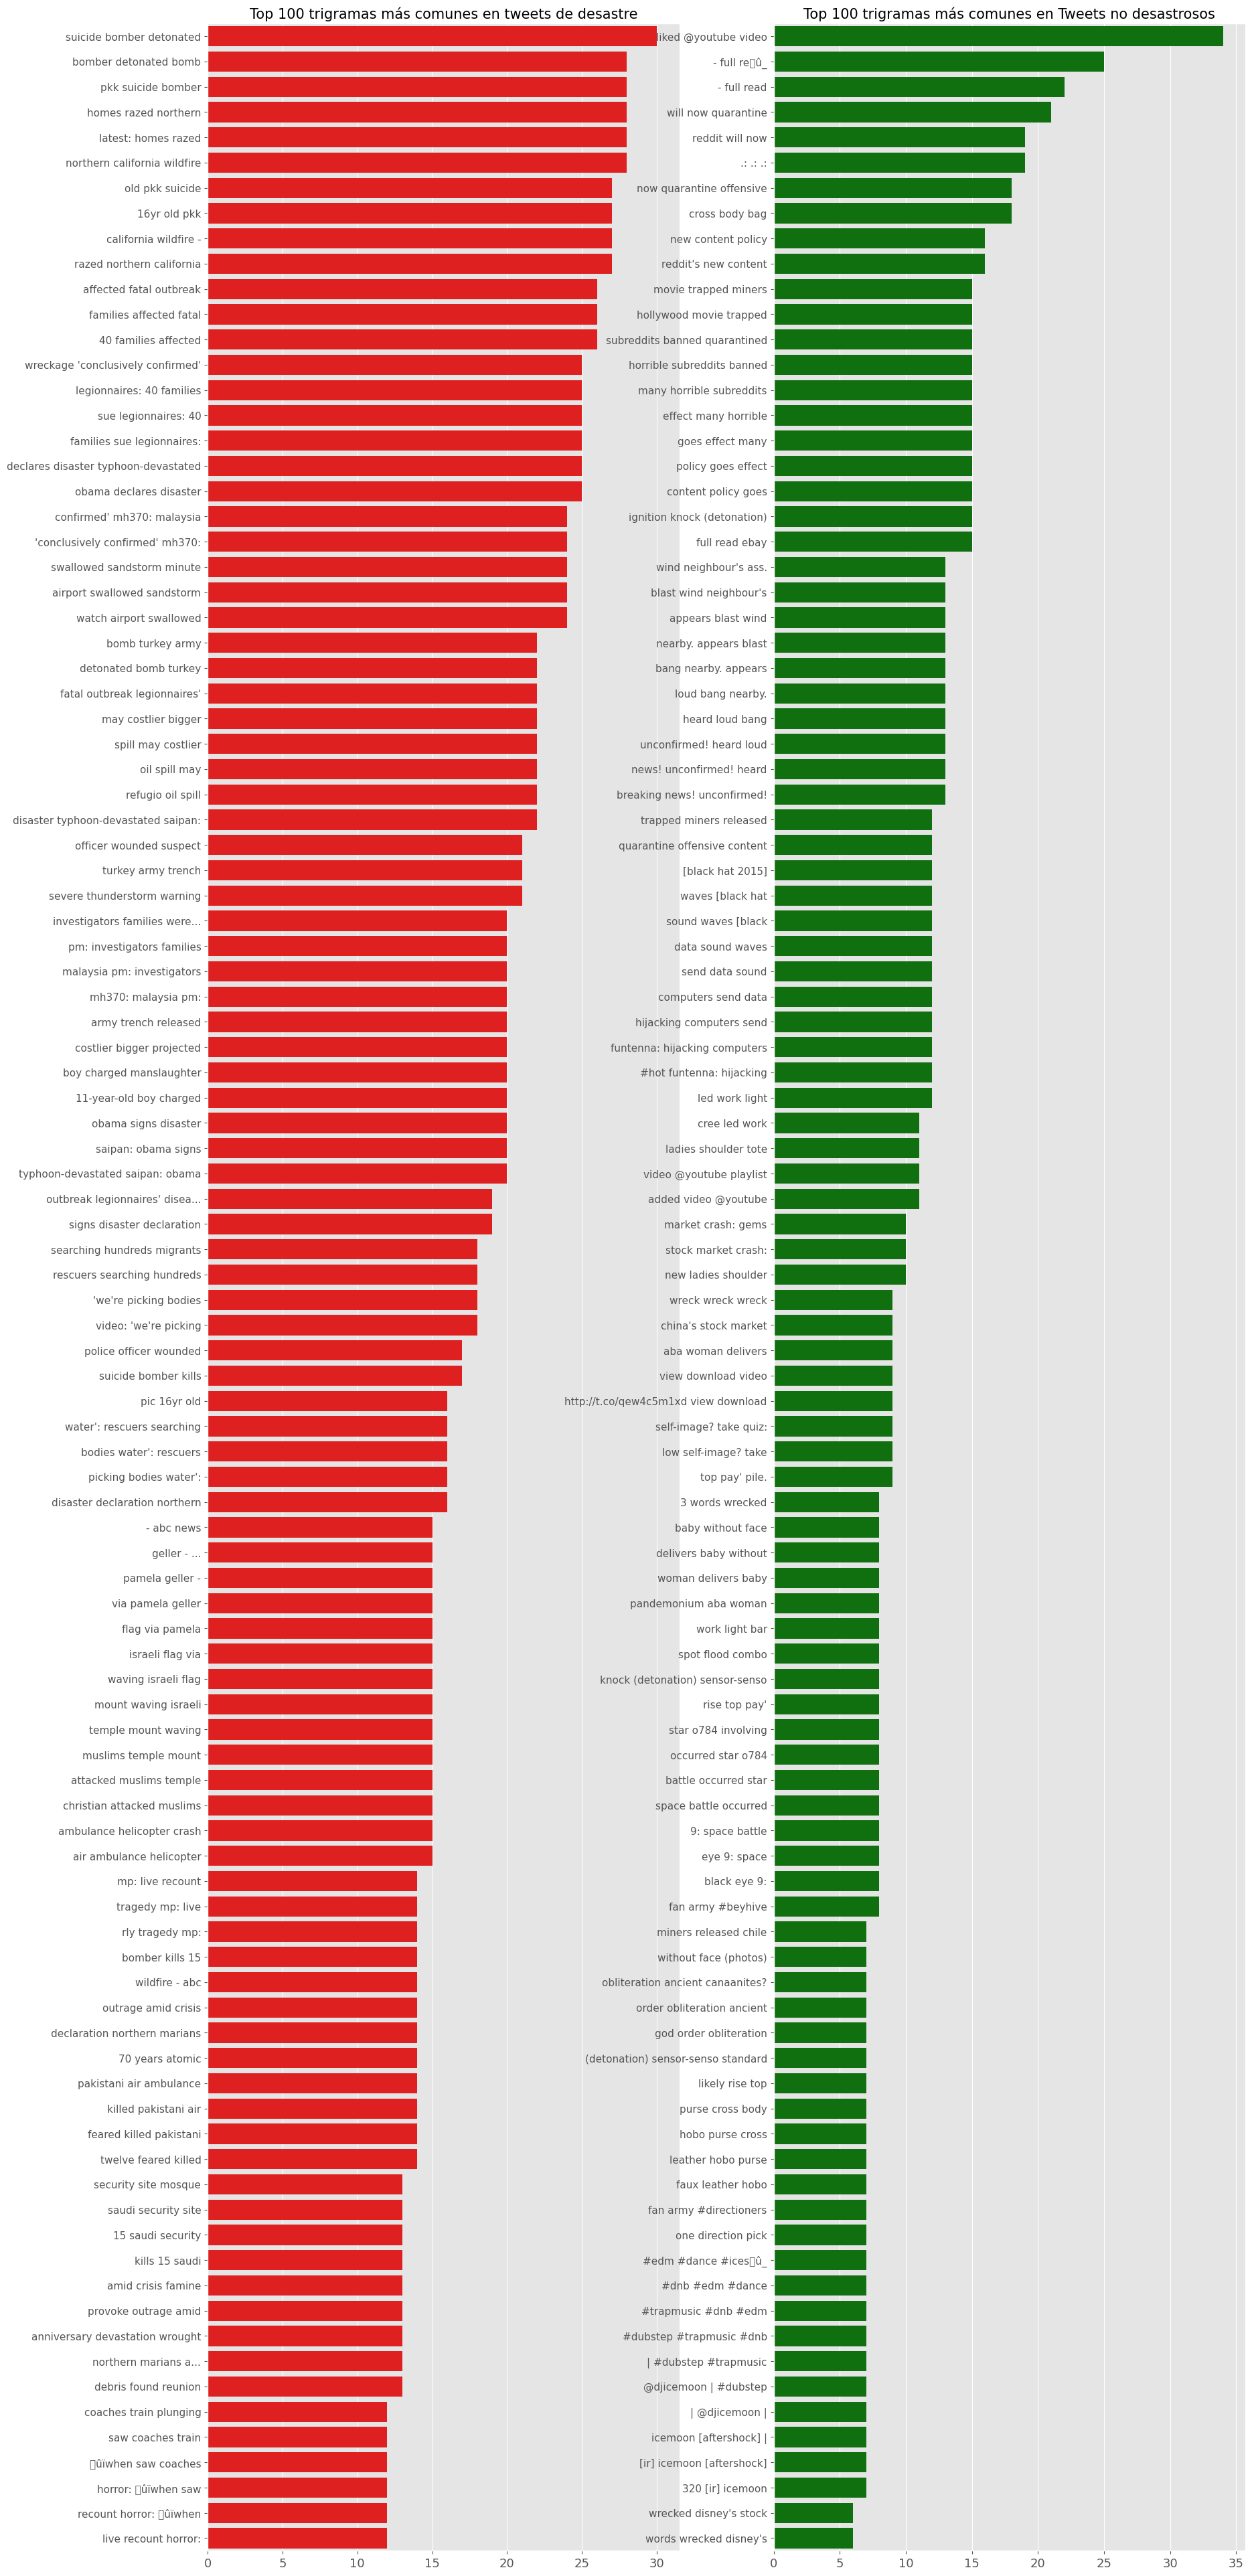

In [118]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 50), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} trigramas más comunes en tweets de desastre', fontsize=15)
axes[1].set_title(f'Top {N} trigramas más comunes en Tweets no desastrosos', fontsize=15)

plt.show()

Aquí vamos a conseguir las MetaCaracterísticas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

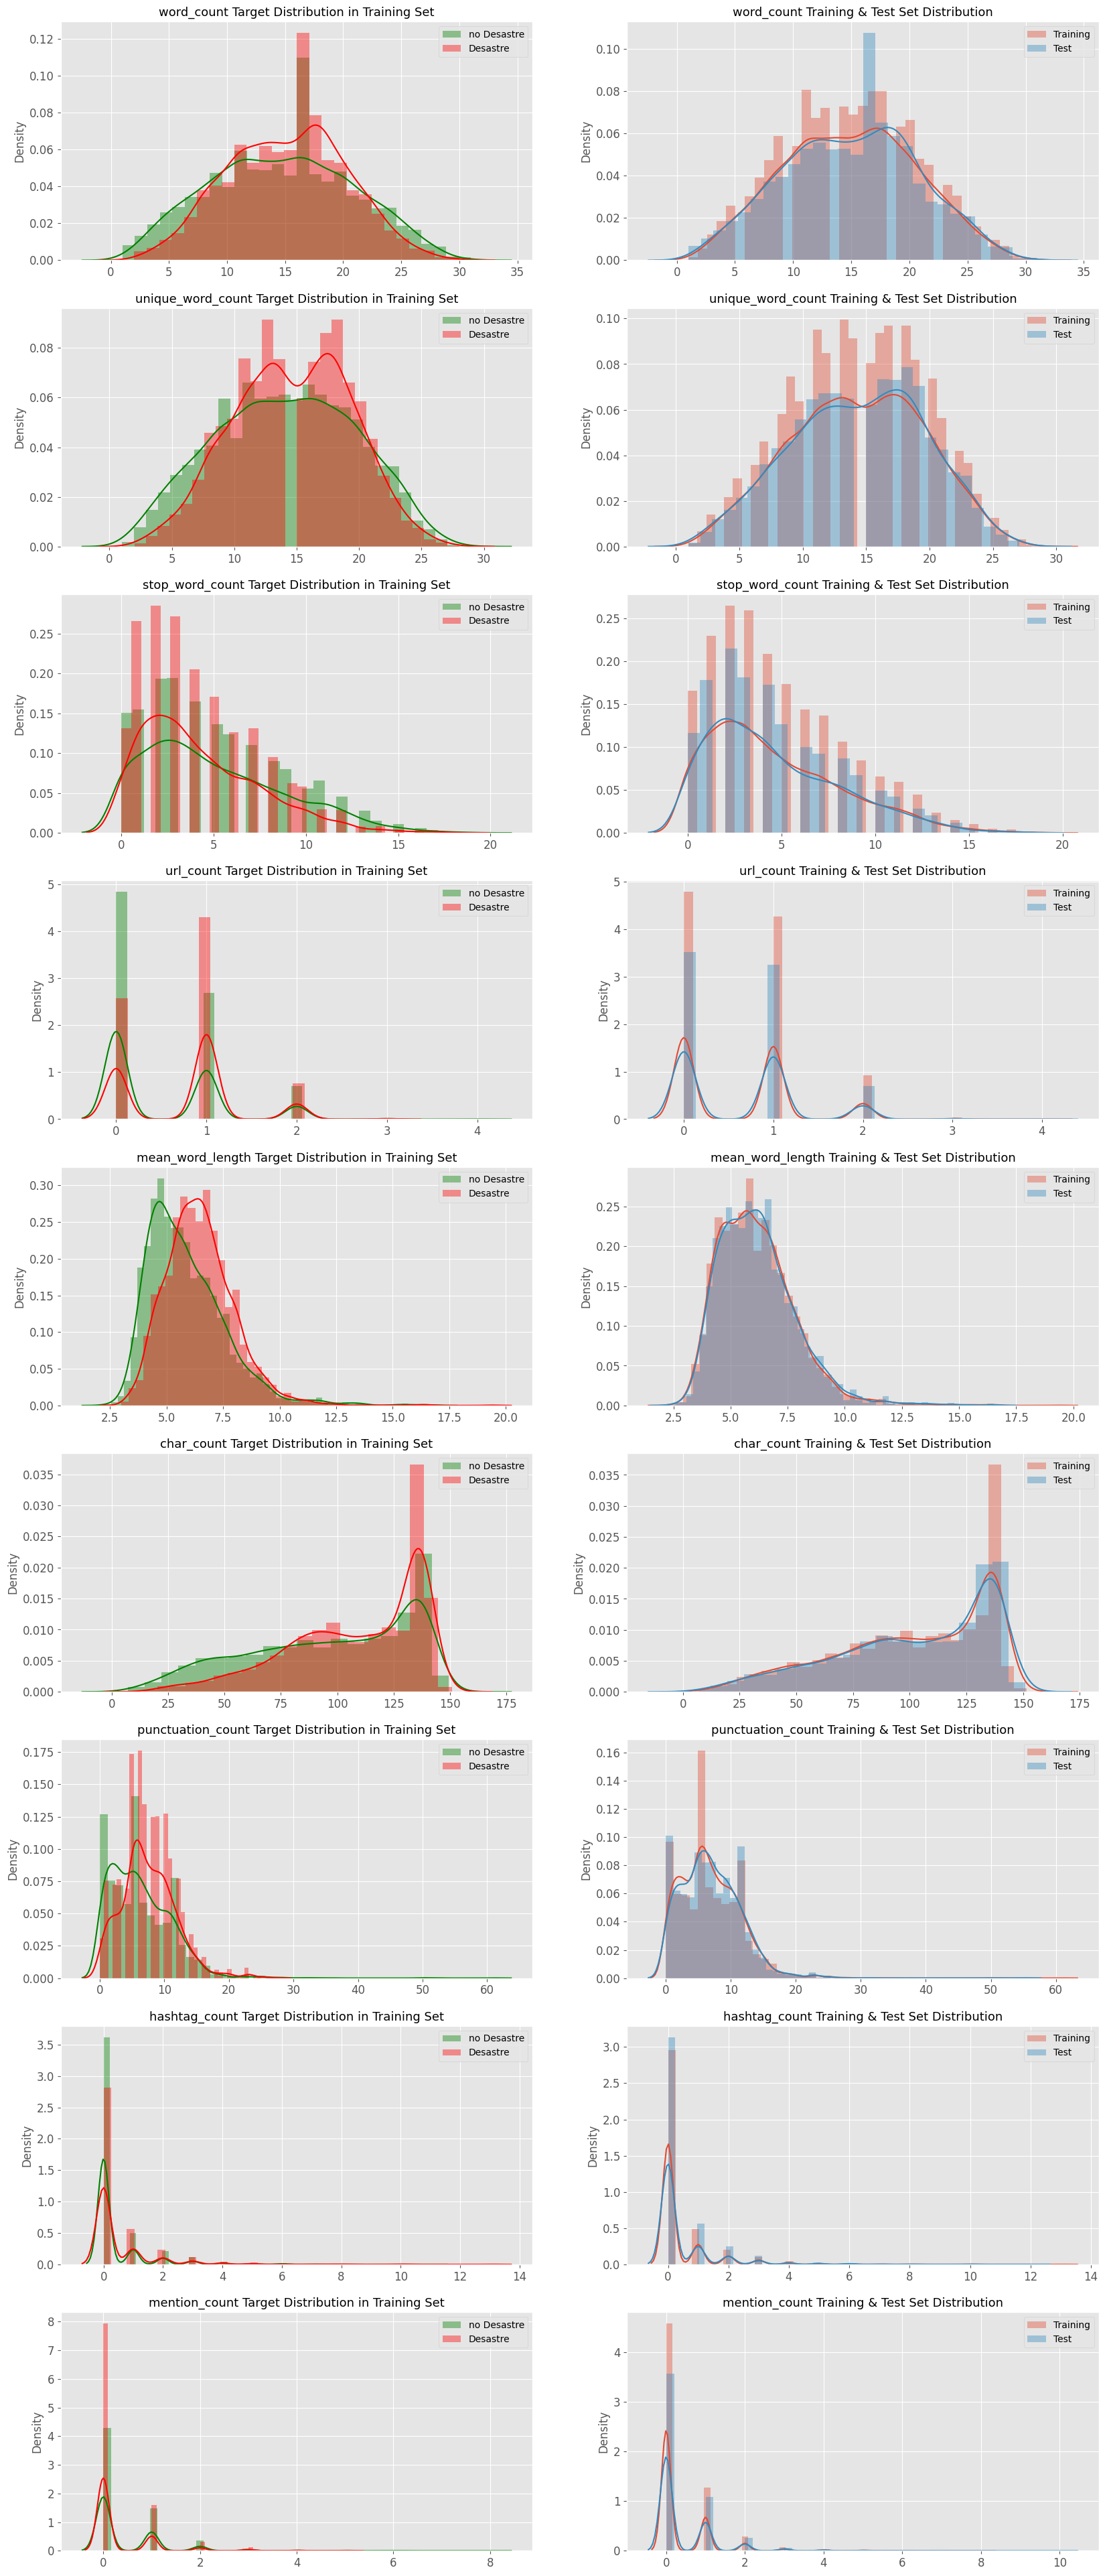

In [134]:
# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))


METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = df_train['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_train.loc[~DISASTER_TWEETS][feature], label='no Desastre', ax=axes[i][0], color='green')
    sns.distplot(df_train.loc[DISASTER_TWEETS][feature], label='Desastre', ax=axes[i][0], color='red')

    sns.distplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

# **Conclusiones**

De lo anteriormente expuesto en el documento se logró verificar que usualemente una de las formas más comúnes de saber si algun "Tweet" es verídico o no lo és resultó ser algo realmente más complicado de lo que se esperaba, pues si se hacía un analisis sencillo relacionando solamente el tweet con un lugar en específico no obtendríamos nada, y de la misma forma buscando el número de palabras con comparativas, de igual modo revisando signos de puntuación.

En realidad no parecía que hubiera una forma muy útil de saber la relación de llegar a saber si eran verídicos, hasta que se empezáron a ver los trigramas, múchos de los tweets que resultaban ser verdaderos tendian a empezar con palabras muy fuertes como "bombas, suicidios , etc" mientras que por lo regular los que se trataban se algo falso solían ser los que solian estar apoyados de alguna información que según lo respalda o que traía algún hipervínculo consigo mismo.

Es por ello que de aquí podemos concluir que muchas veces el lenguaje natural es complicado de traducir y más cuando lo hace una computadora, pues una cosa son los problemas que suelen tener muchos números, pero en éste se encontró el especial desafío de que casi todo era una cadena larga de de caracteres muchas veces muy diferentes entre si mismos. 

# **Referencias y Créditos**

1.descarga de datos
Aquí si me va a tener que disculpar, pues los datos ocupados en Colaboratory se suelen borrar apenas se inicia otra sesión :c , así que si los tendría que descargar del siguiente Link 
https://www.kaggle.com/competitions/nlp-getting-started/data

2.Scripts tomados y modificados de: 

https://www.youtube.com/watch?v=VkU-9Us6Rpw&t=435s

https://www.kaggle.com/code/vbmokin/nlp-eda-bag-of-words-tf-idf-glove-bert


https://www.kaggle.com/code/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk

https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove

https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert#9.-Preprocessed-Datasets


3.literatura consultada
https://www.rdocumentation.org/packages/mfe/versions/0.1.5/topics/metafeatures

https://arxiv.org/pdf/2102.03776v1.pdf


